 


# Title: Flatten the Curve!
### Team members: Joh Eun Kang, Dinesh Sreekanthan


# Getting Start

In order to run this notebook efficiently, plase follow the instrunction below.<br>

__Option1)__ recommand  
1. please download the __yellow_tripdata_2019-09.csv__ <br>
 https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page
2. In your google drive, make a directory called "yellow" and put this notebook in the yellow directory. Your should be in the <br>
__/content/drive/My Drive/yellow/project_4__ <br>


__Option2)__
1. please download the __yellow_tripdata_2019-09.csv__ <br>
 https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page 

2. Then, you change the file paths in this notebook to your own file paths.

# Assumtion: <br>

1. We are only using 2019 September data 
2. Only Manhattan Area location number 43 (central park).<br>
3. User input value is needed (reservation date, reservation time)
4. Reject reservation if there are more people than threshold

 


# Import Libraries


In [0]:
import numpy as np
import pandas as pd
import os
import sys
import io

# Download data & Mount to your Google Drive

In [0]:
# from the github, download the data we used for this project.

In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
%cd /content/drive/My Drive/yellow/project_4

/content/drive/My Drive/yellow/project_4


In [0]:
!ls

 taxi+_zone_lookup.csv		 yellow_tripdata_2017-09.csv
'taxi_zone_map_manhattan .jpg'	 yellow_tripdata_2018-09.csv
 yellow_tripdata_2014-09.csv	 yellow_tripdata_2019-09.csv
 yellow_tripdata_2015-09.csv


# CSV file from Google Drive
1. Left of your colab file, you can fine the files Icon. 
2. go to drive -> My Drive 
3. find the 'yello' file 
4. copy the path

__NOTE__ since we have alreay have the code below, you will be fine if your location is same as our location. <br>

In [0]:
y_2019 = pd.read_csv('/content/drive/My Drive/yellow/project_4/yellow_tripdata_2019-09.csv')


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
y_2019.iloc[1:5]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
1,1.0,2019-09-01 00:29:17,2019-09-01 00:57:54,1.0,5.5,1.0,N,161,256,2.0,22.5,3.0,0.5,0.0,0.0,0.3,26.3,2.5
2,1.0,2019-09-01 00:41:32,2019-09-01 00:41:36,1.0,2.9,1.0,N,145,145,2.0,2.5,0.5,0.5,0.0,0.0,0.3,3.8,0.0
3,1.0,2019-09-01 00:59:11,2019-09-01 00:59:15,1.0,0.0,1.0,N,145,145,2.0,2.5,0.5,0.5,0.0,0.0,0.3,3.8,0.0
4,1.0,2019-09-01 00:39:41,2019-09-01 00:45:06,1.0,1.5,1.0,N,95,93,2.0,7.0,0.5,0.5,0.0,0.0,0.3,8.3,0.0


In [0]:
y_2019.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge'],
      dtype='object')

In [0]:
print(len(y_2019))

6567788


# Part 1

## Data preprocessing

In [0]:
y_2019.columns = [c.replace(" ", "") for c in y_2019.columns] # remove space in column name


In [0]:
y_2019.iloc[1:5]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
1,1.0,2019-09-01 00:29:17,2019-09-01 00:57:54,1.0,5.5,1.0,N,161,256,2.0,22.5,3.0,0.5,0.0,0.0,0.3,26.3,2.5
2,1.0,2019-09-01 00:41:32,2019-09-01 00:41:36,1.0,2.9,1.0,N,145,145,2.0,2.5,0.5,0.5,0.0,0.0,0.3,3.8,0.0
3,1.0,2019-09-01 00:59:11,2019-09-01 00:59:15,1.0,0.0,1.0,N,145,145,2.0,2.5,0.5,0.5,0.0,0.0,0.3,3.8,0.0
4,1.0,2019-09-01 00:39:41,2019-09-01 00:45:06,1.0,1.5,1.0,N,95,93,2.0,7.0,0.5,0.5,0.0,0.0,0.3,8.3,0.0


In [0]:
y_2019=y_2019[['tpep_pickup_datetime', 'tpep_dropoff_datetime','passenger_count','PULocationID','DOLocationID']]


In [0]:
y_2019["Type"]="yellow" # EDA analysis label


Do this for all those dataset

In [0]:
y_2019.iloc[1:5]

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,PULocationID,DOLocationID,Type
1,2019-09-01 00:29:17,2019-09-01 00:57:54,1.0,161,256,yellow
2,2019-09-01 00:41:32,2019-09-01 00:41:36,1.0,145,145,yellow
3,2019-09-01 00:59:11,2019-09-01 00:59:15,1.0,145,145,yellow
4,2019-09-01 00:39:41,2019-09-01 00:45:06,1.0,95,93,yellow


In [0]:
y_2019.columns

Index(['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count',
       'PULocationID', 'DOLocationID', 'Type'],
      dtype='object')

## Seperate the Dropoff_time to hour, minute, second

In [0]:
# datetime -> date, time
y_prac['dropoff_dates'] = pd.to_datetime(y_prac['tpep_dropoff_datetime']).dt.date
y_prac['dropoff_time'] = pd.to_datetime(y_prac['tpep_dropoff_datetime']).dt.time
y_prac[['h','m','s']] = y_prac['dropoff_time'].astype(str).str.split(':', expand=True).astype(int)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

In [0]:
y_prac.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,PULocationID,DOLocationID,Type,dropoff_dates,dropoff_time,h,m,s
1,2019-09-01 00:29:17,2019-09-01 00:57:54,1.0,161,256,yellow,2019-09-01,00:57:54,0,57,54
2,2019-09-01 00:41:32,2019-09-01 00:41:36,1.0,145,145,yellow,2019-09-01,00:41:36,0,41,36
3,2019-09-01 00:59:11,2019-09-01 00:59:15,1.0,145,145,yellow,2019-09-01,00:59:15,0,59,15
4,2019-09-01 00:39:41,2019-09-01 00:45:06,1.0,95,93,yellow,2019-09-01,00:45:06,0,45,6
5,2019-09-01 00:00:08,2019-09-01 00:36:43,2.0,161,232,yellow,2019-09-01,00:36:43,0,36,43


In [0]:
y_2019['dropoff_dates'] = pd.to_datetime(y_2019['tpep_dropoff_datetime']).dt.date
y_2019['dropoff_time'] = pd.to_datetime(y_2019['tpep_dropoff_datetime']).dt.time
y_2019[['h','m','s']] = y_2019['dropoff_time'].astype(str).str.split(':', expand=True).astype(int)

In [0]:
y_2019.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,PULocationID,DOLocationID,Type,dropoff_dates,dropoff_time,h,m,s
0,2019-09-01 00:06:48,2019-09-01 00:25:46,1.0,186,161,yellow,2019-09-01,00:25:46,0,25,46
1,2019-09-01 00:29:17,2019-09-01 00:57:54,1.0,161,256,yellow,2019-09-01,00:57:54,0,57,54
2,2019-09-01 00:41:32,2019-09-01 00:41:36,1.0,145,145,yellow,2019-09-01,00:41:36,0,41,36
3,2019-09-01 00:59:11,2019-09-01 00:59:15,1.0,145,145,yellow,2019-09-01,00:59:15,0,59,15
4,2019-09-01 00:39:41,2019-09-01 00:45:06,1.0,95,93,yellow,2019-09-01,00:45:06,0,45,6


## Dataframe wrt dropoff location number (43. Central Park)

In [0]:
# with 2019 data 
y_2019_dropoff = y_2019[y_2019['DOLocationID']== 43]
y_2019_dropoff= y_2019_dropoff.dropna()
y_2019_dropoff

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,PULocationID,DOLocationID,Type,dropoff_dates,dropoff_time,h,m,s
142,2019-09-01 00:37:18,2019-09-01 00:51:57,1.0,226,43,yellow,2019-09-01,00:51:57,0,51,57
191,2019-09-01 00:48:28,2019-09-01 01:02:57,1.0,163,43,yellow,2019-09-01,01:02:57,1,2,57
393,2019-09-01 00:29:31,2019-09-01 00:44:18,4.0,234,43,yellow,2019-09-01,00:44:18,0,44,18
631,2019-09-01 00:53:08,2019-09-01 00:59:58,5.0,263,43,yellow,2019-09-01,00:59:58,0,59,58
803,2019-09-01 00:58:56,2019-09-01 01:08:58,1.0,164,43,yellow,2019-09-01,01:08:58,1,8,58
...,...,...,...,...,...,...,...,...,...,...,...
6532554,2019-09-30 23:28:56,2019-09-30 23:35:58,1.0,48,43,yellow,2019-09-30,23:35:58,23,35,58
6532585,2019-09-30 23:51:12,2019-09-30 23:54:16,1.0,236,43,yellow,2019-09-30,23:54:16,23,54,16
6532927,2019-09-30 23:58:22,2019-10-01 00:07:14,2.0,162,43,yellow,2019-10-01,00:07:14,0,7,14
6533083,2019-09-30 23:31:03,2019-09-30 23:39:39,1.0,141,43,yellow,2019-09-30,23:39:39,23,39,39


In [0]:
y_2019_dropoff_plot= y_2019_dropoff.groupby('h').count()[['passenger_count']]
y_2019_dropoff_plot

,passenger_count
h,
0,1312
1,675
2,373
3,247
4,212
5,294
6,995
7,2496
8,4275


In [0]:
y_2019_dropoff_plot = y_2019_dropoff_plot.reset_index()

## Plot

Text(0, 0.5, '# people')

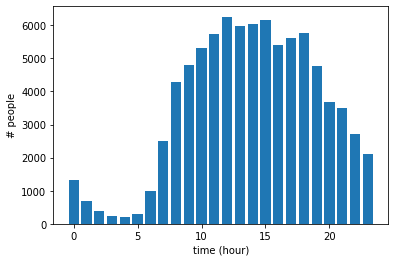

In [0]:
import matplotlib.pyplot as plt
plt.bar(y_2019_dropoff_plot['h'],y_2019_dropoff_plot['passenger_count'])
plt.xlabel('time (hour)')
plt.ylabel('# people')

# Part 2

__This should be made as a function__
1. Take input (date, location)
2. from the input date and location (43), create new dataframe 
3. plot the data frame ( we don't need it ... maybe not? )
4. If there are more people than threshold at the specific time and location number(user's input), add 2 hours on dropoff time. Then, see if the user can go there after 2 hours. ...etc.
5. recommand the available dropoff time for user.
6. Done 





The user needs to enter the dropoff ID of their destination. To convert the location to ID, we can use the following code. <br>
TLC taxi zone location IDs, location names and corresponding boroughs for each ID is found at this url https://s3.amazonaws.com/nyc-tlc/misc/taxi+_zone_lookup.csv.

In [0]:
import pandas as pd
data = pd.read_csv('https://s3.amazonaws.com/nyc-tlc/misc/taxi+_zone_lookup.csv')
yellow=data[data['service_zone'] == "Yellow Zone"] 
yellow2=yellow.drop(columns=['service_zone'], axis=1)

print(yellow2)


     LocationID    Borough                                           Zone
3             4  Manhattan                                  Alphabet City
11           12  Manhattan                                   Battery Park
12           13  Manhattan                              Battery Park City
23           24  Manhattan                                   Bloomingdale
42           43  Manhattan                                   Central Park
44           45  Manhattan                                      Chinatown
47           48  Manhattan                                   Clinton East
49           50  Manhattan                                   Clinton West
67           68  Manhattan                                   East Chelsea
78           79  Manhattan                                   East Village
86           87  Manhattan                       Financial District North
87           88  Manhattan                       Financial District South
89           90  Manhattan            

# Application
In this part, we take user's input and give them a result of <br>
__current population of the location, maximum allowed safe capacity,__ and __recommandation time__
- Date
- Location ID (43)
- Drop-off time

## Input date (%Y-%m-%d)

NOTE: since we are using only the September 2019 data, please enter the date between __2019-09-01__ and  __2019-09-30__

In [0]:
user_date = input("Enter desired arrival date: ")

Enter desired arrival date: 2019-09-02


## Input Location ID (43)

In [0]:
user_loc = input("Enter drop off location ID: ")

Enter drop off location ID: 43


## Input Time (ex. 12:30)

In [0]:
user_time = input("Enter what time you would like to book a slot (24H format): ")

Enter what time you would like to book a slot (24H format): 9:20


## System

In [0]:
#from datetime import datetime, timedelta
#then = datetime.strptime(user_time, '%Y-%m-%d').date()
#user_hour = then.hour
user_count=0
user_hour = user_time.partition(":")[0]

for x in range(24):
  if (int(y_2019_dropoff_plot.h[x]) is int(user_hour)):
    user_count = y_2019_dropoff_plot.passenger_count[x]
    break
print("At the chosen time, the current population is")
print(user_count)
print()

##DEFINE THRESHOLD
print("The maximum allowed safe capacity is")

#threshold=4000 #threshold set by system administrator
threshold=sum(y_2019_dropoff_plot.passenger_count)/len(y_2019_dropoff_plot.passenger_count) #threshold calculated by average over the plot
print(int(threshold))
print()

#original

# if int(threshold) <= int(user_count):
#   for x in range(int(user_hour),24):
#     if (int(y_2019_dropoff_plot.passenger_count[x]) < int(threshold)):
#       recom_hour = y_2019_dropoff_plot.h[x]
#       break

# print("We recommend you book when the number of bookings is below the maximum allowed safe capacity, which is at")
# print(recom_hour,":00")


recom_ls = []

if int(threshold) > int(user_count):
  recom_hour = user_hour
  print("Hurray! you are safe!")
  print("We made a reservation at:", user_time)

else:
  print("Sorry user, you cannot make a reservation at: ", user_time)
  for x in range(int(user_hour),24):
    if y_2019_dropoff_plot.passenger_count[x] < int(threshold):
      recom_ls.append(x)
  min_recom = min(recom_ls)
  print("Available time is: ",recom_ls)
  print("The earliest time is: ", min_recom)



At the chosen time, the current population is
4795

The maximum allowed safe capacity is
3527

Sorry user, you cannot make a reservation at:  9:20
Available time is:  [21, 22, 23]
The earliest time is:  21
